In [18]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import random

class Rectangle:
    def __init__(self, width, height):
        self.width = width
        self.height = height
        self.is_rotated = False

    def rotate(self):
        self.width, self.height = self.height, self.width
        self.is_rotated = not self.is_rotated

class Bin:
    def __init__(self, width, height):
        self.width = width
        self.height = height


def isEmpty(bin, matrix, rect, i, j):
    for x in range(i, i - rect.height, -1):
        for y in range(j, j + rect.width):
            if x < 0 or x >= bin.height or y < 0 or y >= bin.width:
                return False
            elif matrix[x][y] != 0:
               return False 
             
    return True

def fillMatrix(matrix, rect, i, j, index):
    for x in range(i, i - rect.height, -1):
        for y in range(j, j + rect.width):
            matrix[x][y] = index
    return matrix

def printMatrix(matrix):
    for i in range(len(matrix)):
        for j in range(len(matrix[i])):
            print(f"{matrix[i][j]:3}", end="")
        print()
    print()

def drawMatrix(bin, drawRectangles):

    #rectangle = patches.Rectangle((x, y), width, height, linewidth=1, edgecolor='r', facecolor='none')
    fig, ax = plt.subplots(figsize=(20, 20))
    [x.set_linewidth(5) for x in ax.spines.values()]
    for patch in drawRectangles:
        ax.add_patch(patch)

    plt.xlim(0, bin_width)
    plt.ylim(0, bin_height)

 #   plt.xticks(range(0, bin_width + 1, 4))
  #  plt.yticks(range(0, bin_height + 1, 4))  

    #plt.gca().invert_yaxis()
    
    plt.savefig('asdad.png',bbox_inches='tight')
    plt.show()

def readFile(rectangles):
    dosya_yolu = "C7_2"

    try:
        
        with open(dosya_yolu, 'r') as dosya:
            
            data = dosya.readlines()
            for i in range(len(data)):
                data[i] = data[i].split('\n')[0]
            count = int(data[0])
            bin_width = int(data[1].split()[0])
            bin_height = int(data[1].split()[1])

            for i in range(2, count + 2):
                width = int(data[i].split()[0])
                height = int(data[i].split()[1])
                rectangles.append(Rectangle(width, height))
        return bin_width, bin_height, rectangles


    except FileNotFoundError:
        print("Belirtilen dosya bulunamadı.")
    except Exception as e:
        print("Dosya okuma sırasında bir hata oluştu:", str(e))



197
True


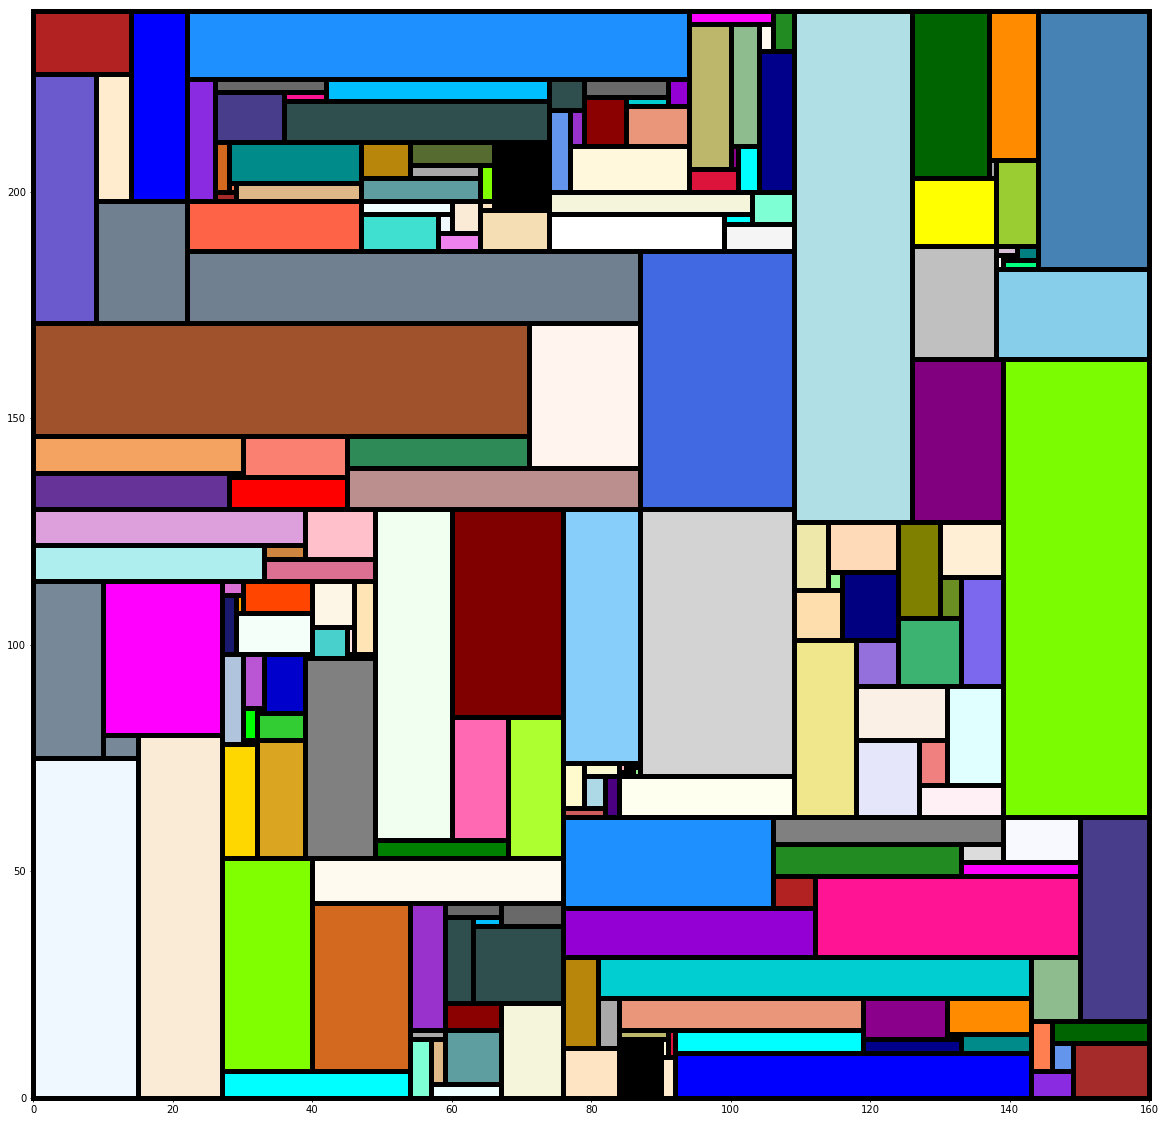

In [20]:
drawRectangles = []
isCorrect = True
rectangles = []
bin_width, bin_height, rectangles = readFile(rectangles)

import matplotlib.colors as mcolors

# Rastgele renkler oluşturmak için renk paleti
colors = list(mcolors.CSS4_COLORS.keys())
color_index = 0  # Renk paletindeki indeksi takip etmek için bir değişken

#random.shuffle(rectangles)

bin = Bin(bin_width, bin_height)
matrix = [[0 for _ in range(bin.width)] for _ in range(bin.height)]

print(len(rectangles))

index = 1
for rect in rectangles:
    isPlaced = False
    i = bin.height - 1
    while i >= 0 and not isPlaced:
        j = 0
        while j < bin.width and not isPlaced:
            if matrix[i][j] == 0 and isEmpty(bin, matrix, rect, i, j):
                matrix = fillMatrix(matrix, rect, i, j, index)
                index += 1
                isPlaced = True

                # Rastgele bir renk seçmek yerine sırayla renkleri kullan
                if color_index < len(colors):
                    selected_color = colors[color_index]
                    color_index += 1
                else:
                    # Renkler tükendiğinde tekrar başa dön
                    color_index = 0
                    selected_color = colors[color_index]
                    color_index += 1

                # Dikdörtgeni seçilen renkte çiz
                drawRectangles.append(patches.Rectangle(
                    (j, bin_height - i - 1),
                    rect.width,
                    rect.height,
                    linewidth=5,
                    edgecolor='black',
                    facecolor=selected_color  # Seçilen renk
                ))
            j += 1
        i -= 1

    if i < 0 and not isPlaced:
        print(f"{rect.width}-{rect.height}  Yerlestirilemedi!")
        isCorrect = False

print(isCorrect)
#printMatrix(matrix)
drawMatrix(bin, drawRectangles)
